In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy

from scipy.signal import argrelextrema
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, RobustScaler, MinMaxScaler

In [2]:
# 1. acc, gyro, pressure data를 length 1000(10sec)정도로 시각화
# 단, acc gyro는 -1~1로 nomalize
# 2. pressure data를 gaussian filter로 smoothing
# 3. SPINA 데이터 단위 보폭으로 나누기
# 4. 나눈 보폭를 속도이용해서 라벨링

In [3]:
# 1. acc, gyro, pressure data를 length 1000(10sec)정도로 시각화
# 단, acc gyro는 -1~1로 nomalize
# 오른발은 미측정

In [4]:
dist_3 = pd.read_csv('3km.csv')
dist_5 = pd.read_csv('5km.csv')
dist_7 = pd.read_csv('7km.csv')
dist_3.head()

,timestep,L_acc_x,L_acc_y,L_acc_z,L_gyro_x,L_gyro_y,L_gyro_z,L_pressure_1,L_pressure_2,L_pressure_3,...,R_pressure_31,R_pressure_32,R_pressure_33,R_pressure_34,R_pressure_35,R_pressure_36,R_pressure_37,R_pressure_38,R_pressure_39,R_pressure_40
0,10.07,-385,-116,-2015,-111,-13,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.08,-385,-116,-2015,-111,-13,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.09,-385,-116,-2015,-111,-13,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.10,-352,-110,-2017,-112,-31,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.11,-381,-171,-1996,-13,32,-2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# acc와 gyro를 [-1, 1] 범위로 MaxAbsScaler

scaler = MaxAbsScaler()
dist_3.iloc[:,1:7] = scaler.fit_transform(dist_3.iloc[:,1:7])
dist_3.head()

,timestep,L_acc_x,L_acc_y,L_acc_z,L_gyro_x,L_gyro_y,L_gyro_z,L_pressure_1,L_pressure_2,L_pressure_3,...,R_pressure_31,R_pressure_32,R_pressure_33,R_pressure_34,R_pressure_35,R_pressure_36,R_pressure_37,R_pressure_38,R_pressure_39,R_pressure_40
0,10.07,-0.161290,-0.012910,-0.237198,-0.019776,-0.005118,0.004759,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.08,-0.161290,-0.012910,-0.237198,-0.019776,-0.005118,0.004759,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.09,-0.161290,-0.012910,-0.237198,-0.019776,-0.005118,0.004759,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.10,-0.147465,-0.012243,-0.237434,-0.019954,-0.012205,0.005710,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.11,-0.159615,-0.019032,-0.234962,-0.002316,0.012598,-0.000476,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# 10sec 기준으로 분할
n = 1000
dist_3_10sec = [dist_3[i*n:(i+1)*n] for i in range((len(dist_3) + n-1)//n)] 
dist_5_10sec = [dist_5[i*n:(i+1)*n] for i in range((len(dist_5) + n-1)//n)] 
dist_7_10sec = [dist_7[i*n:(i+1)*n] for i in range((len(dist_7) + n-1)//n)] 


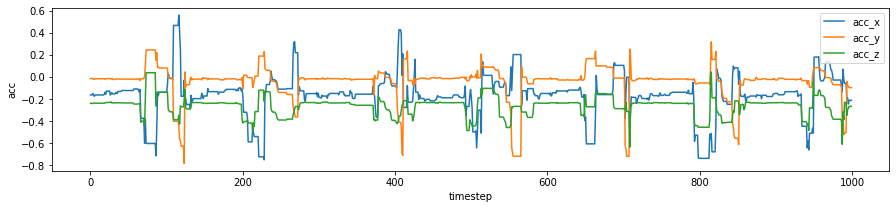

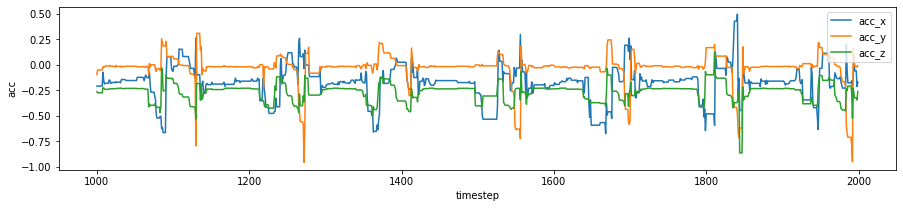

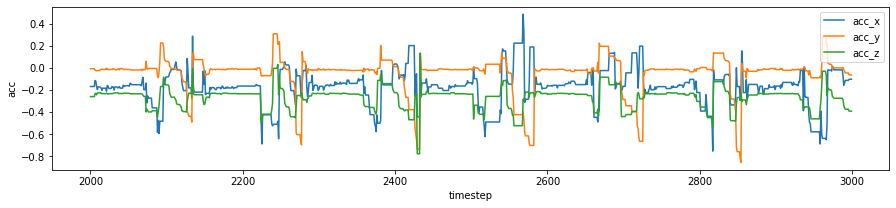

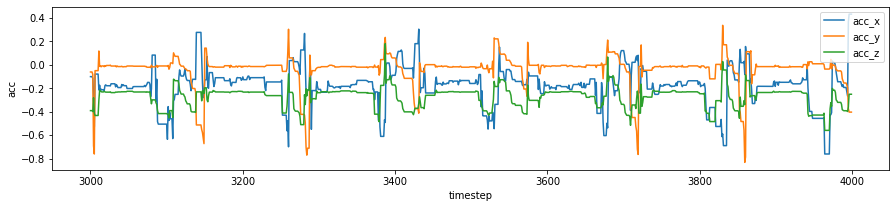

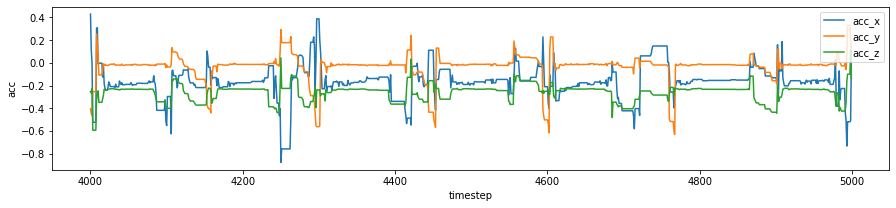

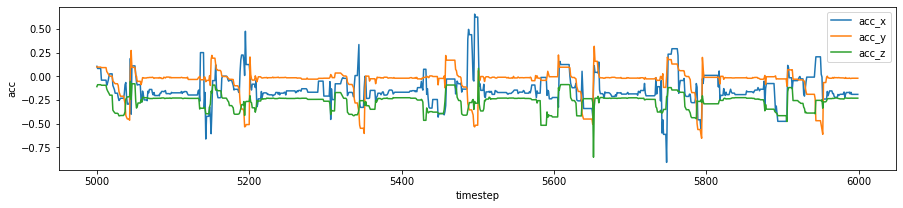

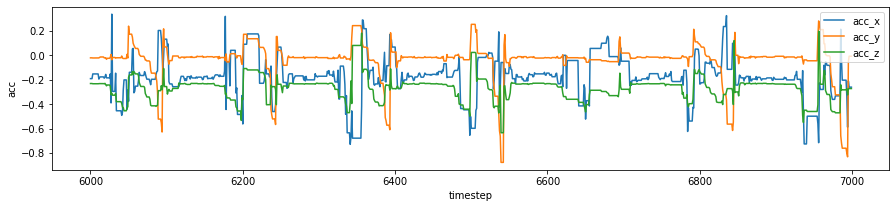

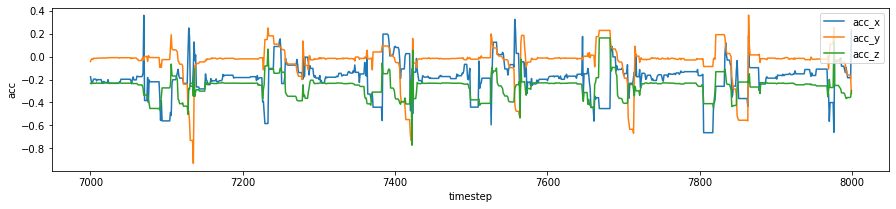

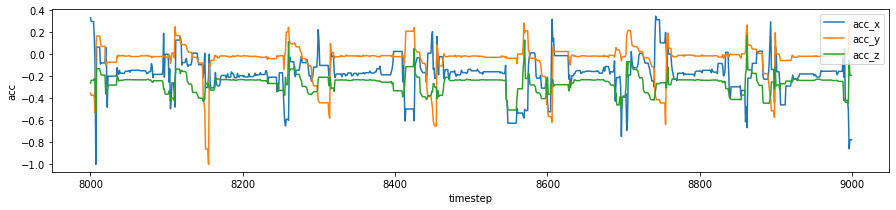

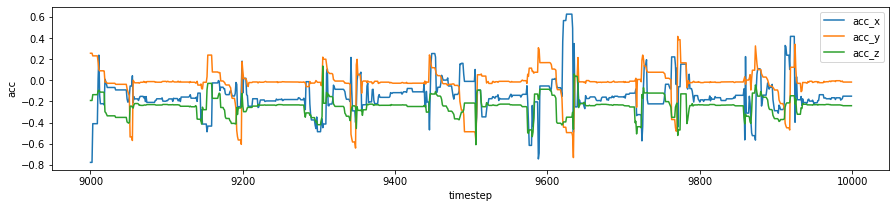

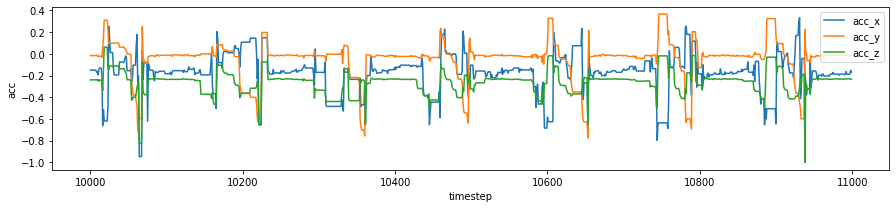

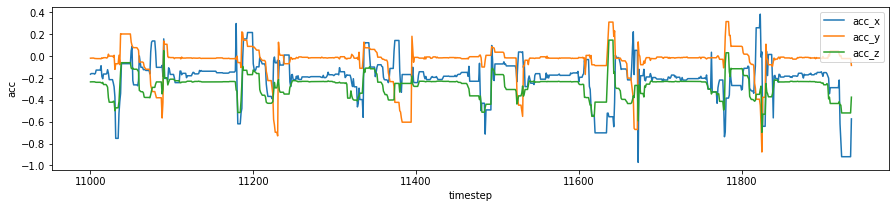

In [7]:
# acc, gyro Visualization
for i in range(len(dist_3_10sec)):
    plt.figure(figsize=(15,3))
    plt.plot(dist_3_10sec[i]['L_acc_x'])
    plt.plot(dist_3_10sec[i]['L_acc_y'])
    plt.plot(dist_3_10sec[i]['L_acc_z'])
    plt.xlabel('timestep')
    plt.ylabel('acc')
    plt.legend(labels=['acc_x', 'acc_y', 'acc_z'], loc='upper right')
    plt.show()

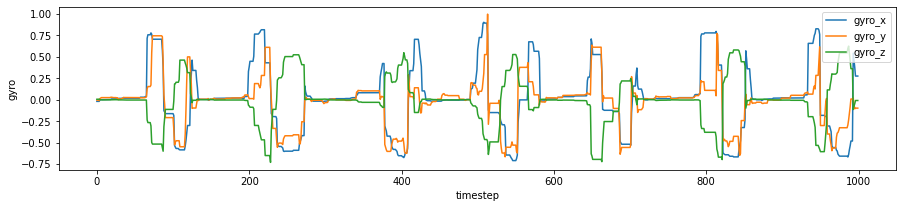

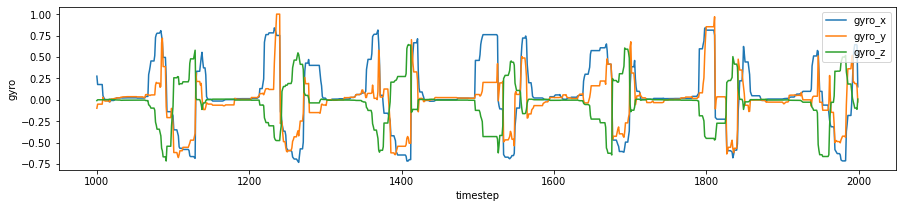

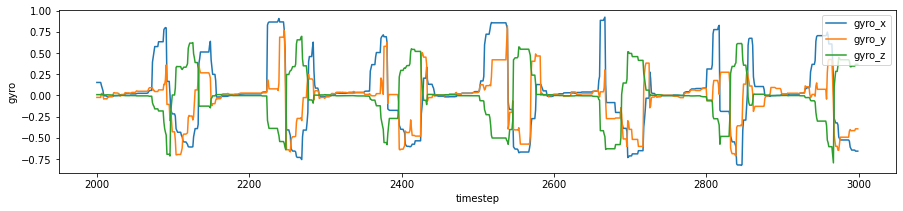

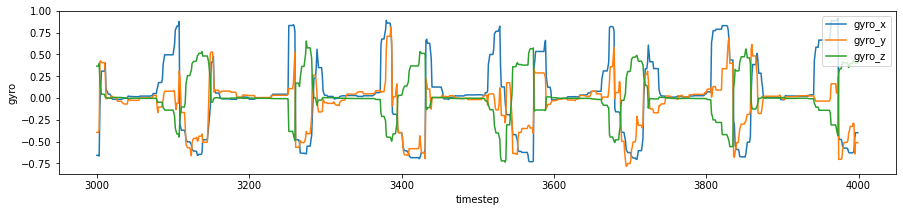

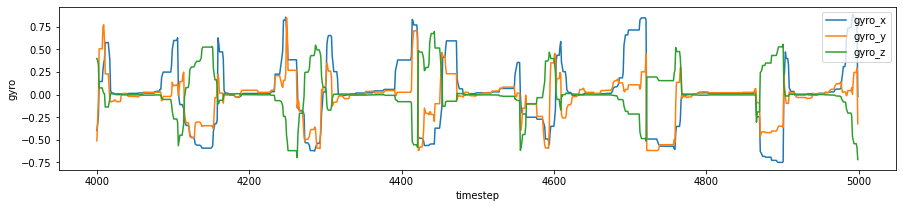

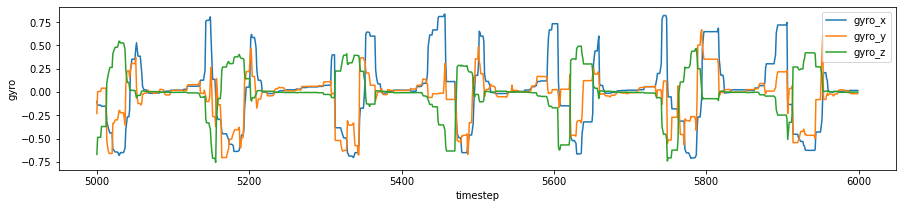

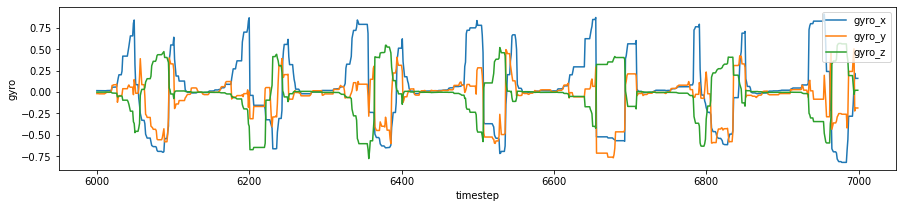

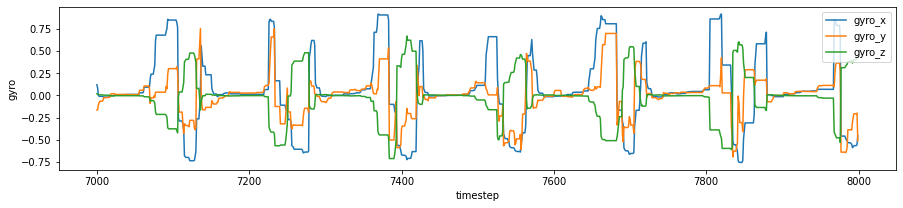

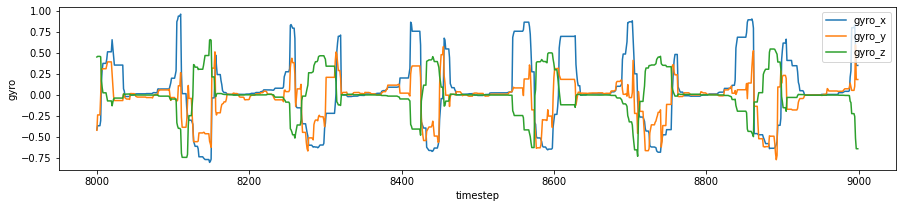

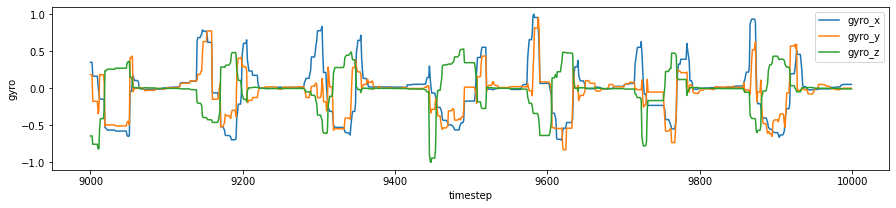

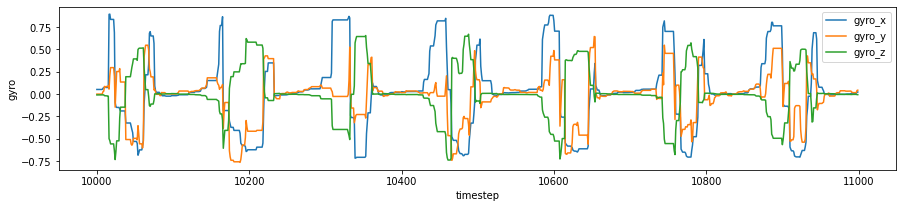

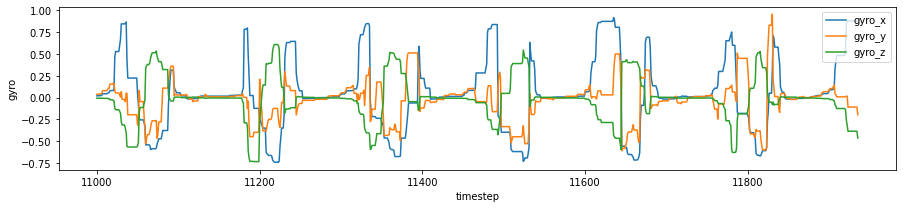

In [8]:
for i in range(len(dist_3_10sec)):
    plt.figure(figsize=(15,3))
    plt.plot(dist_3_10sec[i]['L_gyro_x'])
    plt.plot(dist_3_10sec[i]['L_gyro_y'])
    plt.plot(dist_3_10sec[i]['L_gyro_z'])
    plt.xlabel('timestep')
    plt.ylabel('gyro')
    plt.legend(labels=['gyro_x', 'gyro_y', 'gyro_z'], loc='upper right')
    plt.show()

In [9]:
# 2. pressure data를 gaussian filter로 smoothing
# timestep 별 40개 pressure 값의 평균에 필터 적용

dist_3_prs = dist_3.filter(regex="L_pressure")
pres_mean_3 = np.mean(dist_3_prs, axis=1) # timestep 별 40개 압력 측정값의 평균
pres_mean_gf_3 = pd.Series(scipy.ndimage.gaussian_filter1d(np.mean(dist_3_prs, axis=1), 20))

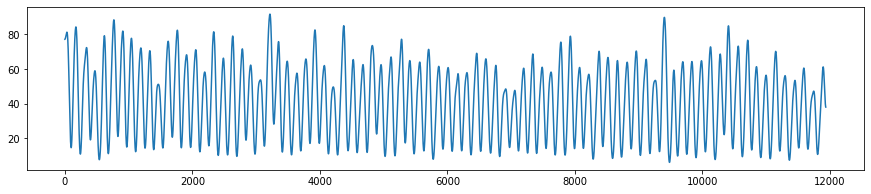

In [10]:
plt.figure(figsize=(15, 3))
plt.plot(pres_mean_gf_3)

In [11]:
n = 1000
pres_10sec_3 = [pres_mean_3[i*n:(i+1)*n] for i in range((len(pres_mean_3) + n-1)//n)] 
pres_10sec_gf_3 = [pres_mean_gf_3[i*n:(i+1)*n] for i in range((len(pres_mean_gf_3) + n-1)//n)] 

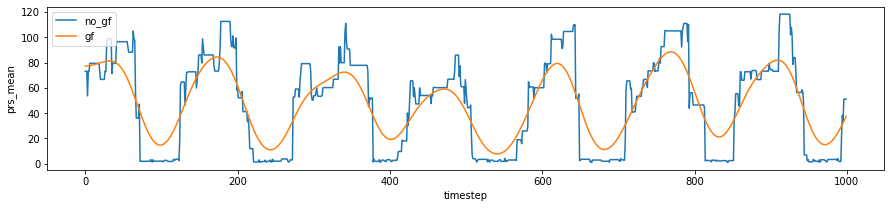

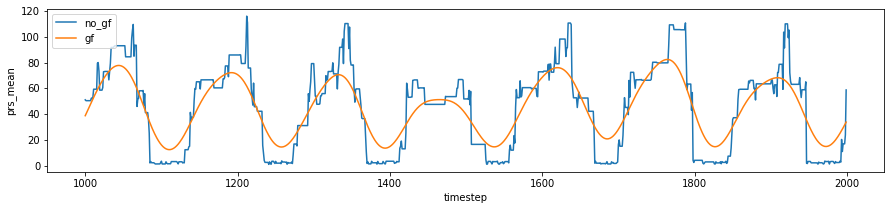

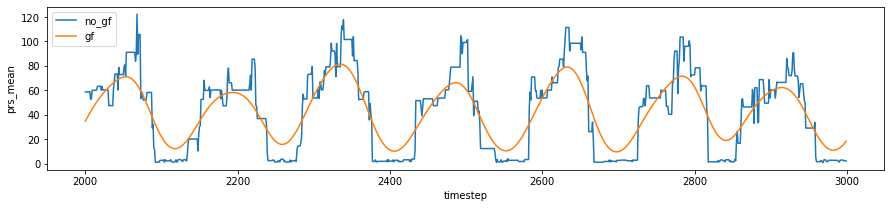

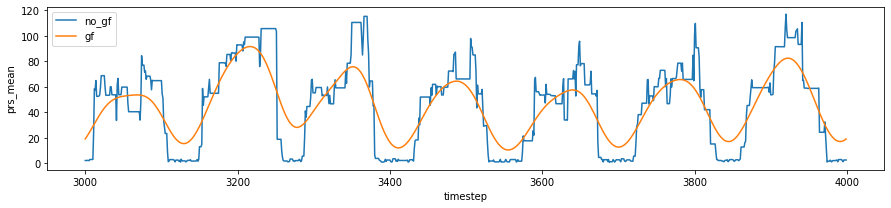

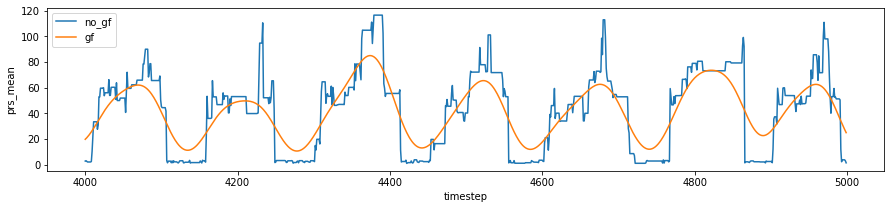

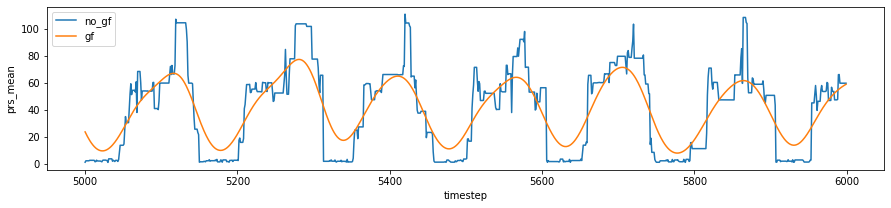

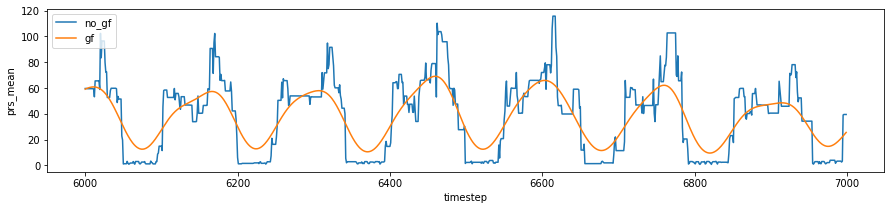

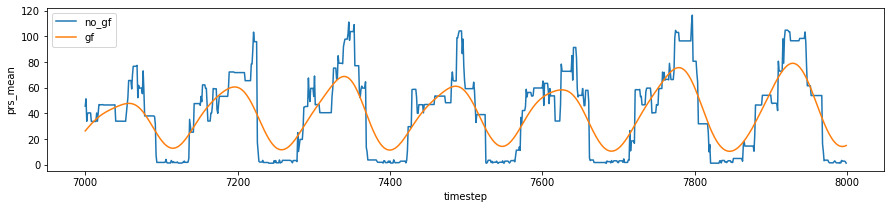

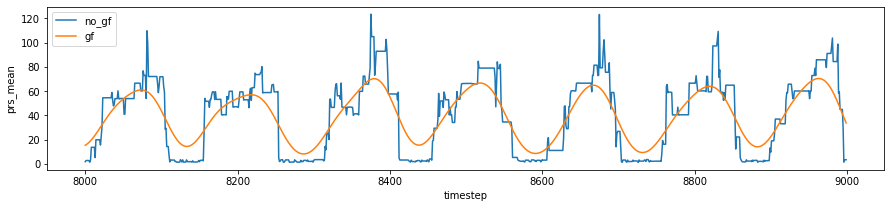

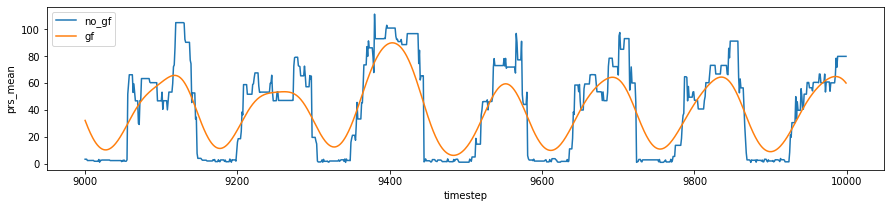

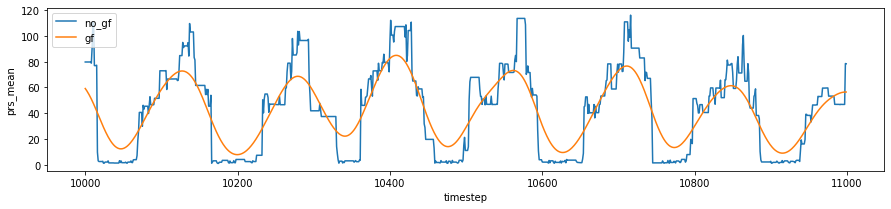

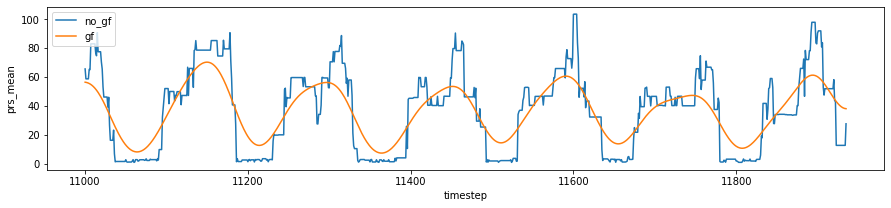

In [12]:
for i in range(len(pres_10sec_3)):
    plt.figure(figsize=(15, 3))
    plt.plot(pres_10sec_3[i])
    plt.plot(pres_10sec_gf_3[i])
    plt.xlabel('timestep')
    plt.ylabel('prs_mean')
    plt.legend(labels=['no_gf', 'gf'], loc='upper left')
    plt.show()

In [13]:
# 3. SPINA 데이터 단위 보폭으로 나누기 : 너무 하드코딩
# 미분을 통한 극소값 활용

loc_min_idx_3 = argrelextrema(np.array(pres_mean_gf_3), np.less)[0]
loc_min_idx_3

array([   98,   243,   401,   541,   682,   832,   971,  1110,  1258,
        1394,  1537,  1685,  1827,  1972,  2118,  2259,  2406,  2552,
        2698,  2841,  2982,  3129,  3278,  3411,  3555,  3700,  3845,
        3991,  4135,  4278,  4442,  4584,  4741,  4890,  5023,  5178,
        5339,  5478,  5631,  5777,  5931,  6075,  6224,  6371,  6522,
        6678,  6820,  6975,  7115,  7258,  7400,  7547,  7691,  7846,
        7994,  8133,  8287,  8438,  8591,  8732,  8882,  9027,  9177,
        9327,  9484,  9611,  9755,  9900, 10047, 10200, 10341, 10476,
       10627, 10773, 10915, 11064, 11214, 11364, 11511, 11655, 11807],
      dtype=int64)

In [14]:
bins = list(range(1, len(dist_3), 1000))
loc_min_df_3 = pd.DataFrame({'loc_min':loc_min_idx_3, 'bins': np.digitize(loc_min_idx_3, bins)})
groups_3 = loc_min_df_3.groupby('bins')

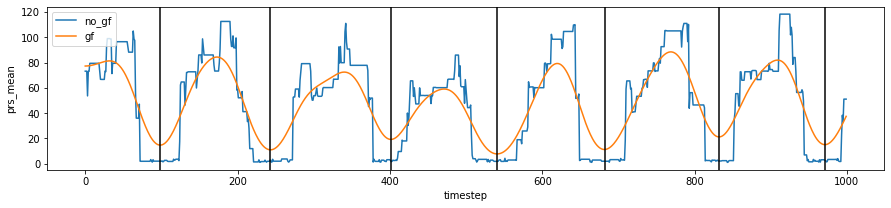

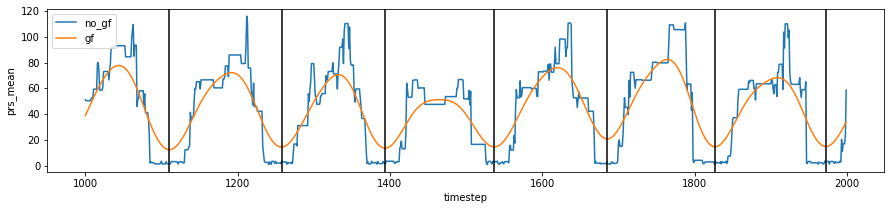

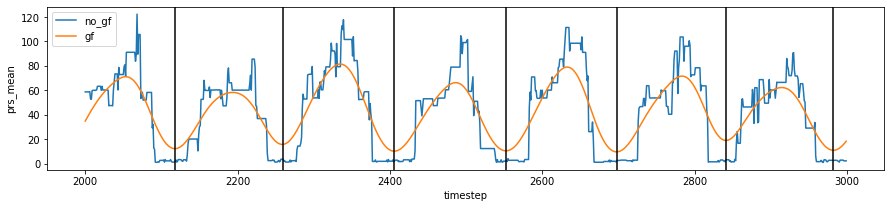

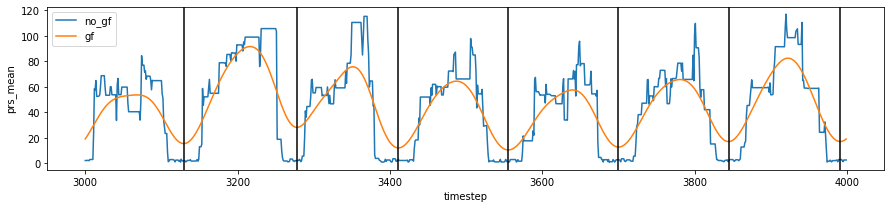

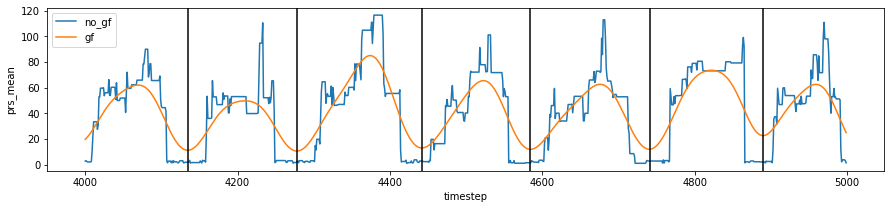

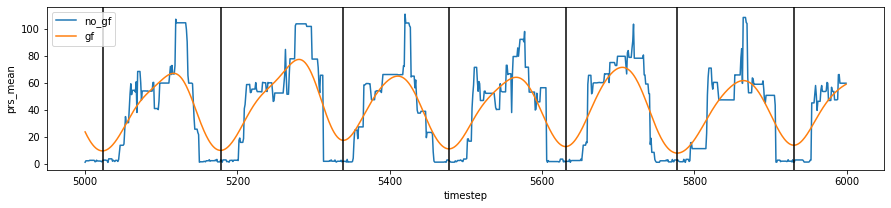

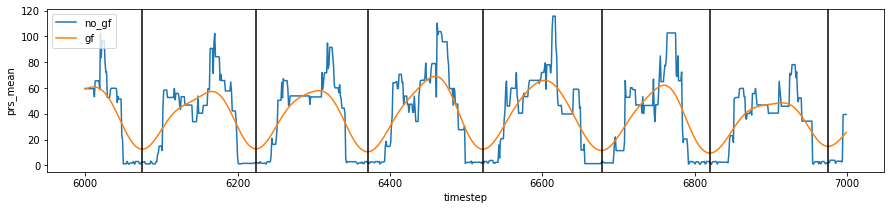

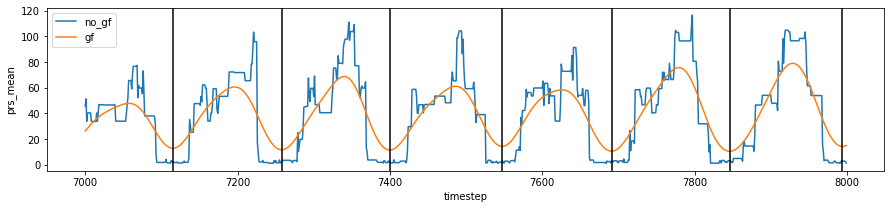

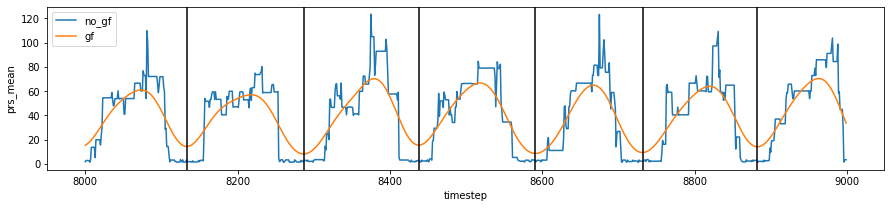

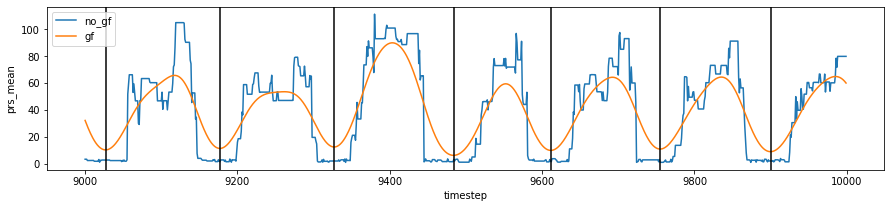

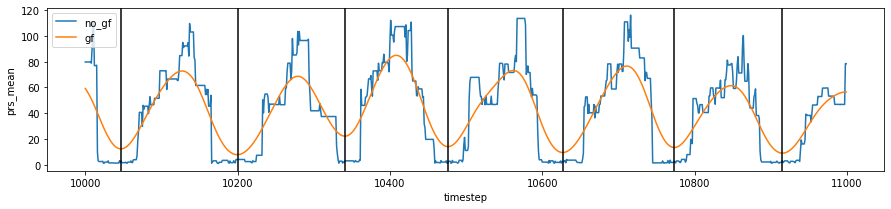

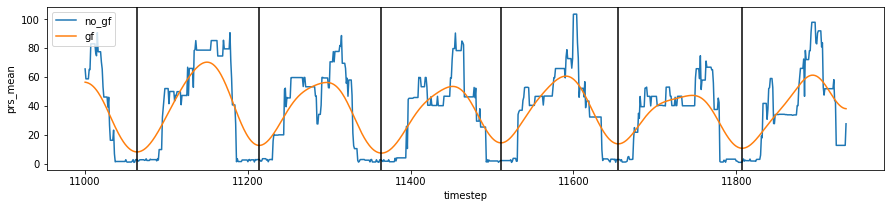

In [15]:
for i in range(len(pres_10sec_3)):
    plt.figure(figsize=(15, 3))
    plt.plot(pres_10sec_3[i])
    plt.plot(pres_10sec_gf_3[i])
    plt.xlabel('timestep')
    plt.ylabel('prs_mean')
    plt.legend(labels=['no_gf', 'gf'], loc='upper left')
    for j in range(len(list(groups_3)[i][1]['loc_min'])):
        plt.axvline(x=np.array(list(groups_3)[i][1]['loc_min'])[j], color='k')
    plt.show()

In [16]:
# 4. 가속도 이용해서 보폭 라벨링
# Label : 한걸음당 거리 구하는 공식
# 활용할 것 : 속력(3km/h), 가속도(acc_xyz), 시간(len(timestep)ms)

In [17]:
# 단위 걸음 기준 timestep
loc_min_idx_3

array([   98,   243,   401,   541,   682,   832,   971,  1110,  1258,
        1394,  1537,  1685,  1827,  1972,  2118,  2259,  2406,  2552,
        2698,  2841,  2982,  3129,  3278,  3411,  3555,  3700,  3845,
        3991,  4135,  4278,  4442,  4584,  4741,  4890,  5023,  5178,
        5339,  5478,  5631,  5777,  5931,  6075,  6224,  6371,  6522,
        6678,  6820,  6975,  7115,  7258,  7400,  7547,  7691,  7846,
        7994,  8133,  8287,  8438,  8591,  8732,  8882,  9027,  9177,
        9327,  9484,  9611,  9755,  9900, 10047, 10200, 10341, 10476,
       10627, 10773, 10915, 11064, 11214, 11364, 11511, 11655, 11807],
      dtype=int64)

In [18]:
# 단위 걸음 당 시간(sec)
gait_unit_sec_3 = np.diff(dist_3['timestep'][loc_min_idx_3]) # 총 80걸음, 단위 걸음 당 시간(초)
gait_unit_sec_3

array([1.45, 1.58, 1.4 , 1.41, 1.5 , 1.39, 1.39, 1.48, 1.36, 1.43, 1.48,
       1.42, 1.45, 1.46, 1.41, 1.47, 1.46, 1.46, 1.43, 1.41, 1.47, 1.49,
       1.33, 1.44, 1.45, 1.45, 1.46, 1.44, 1.43, 1.64, 1.42, 1.57, 1.49,
       1.33, 1.55, 1.61, 1.39, 1.53, 1.46, 1.54, 1.44, 1.49, 1.47, 1.51,
       1.56, 1.42, 1.55, 1.4 , 1.43, 1.42, 1.47, 1.44, 1.55, 1.48, 1.39,
       1.54, 1.51, 1.53, 1.41, 1.5 , 1.45, 1.5 , 1.5 , 1.57, 1.27, 1.44,
       1.45, 1.47, 1.53, 1.41, 1.35, 1.51, 1.46, 1.42, 1.49, 1.5 , 1.5 ,
       1.47, 1.44, 1.52])

In [19]:
# 단위 걸음 당 이동 거리(m) 
gait_unit_dist_3 = (3000 / 3600) * gait_unit_sec_3
print(np.round(gait_unit_dist_3, 4))

[1.2083 1.3167 1.1667 1.175  1.25   1.1583 1.1583 1.2333 1.1333 1.1917
 1.2333 1.1833 1.2083 1.2167 1.175  1.225  1.2167 1.2167 1.1917 1.175
 1.225  1.2417 1.1083 1.2    1.2083 1.2083 1.2167 1.2    1.1917 1.3667
 1.1833 1.3083 1.2417 1.1083 1.2917 1.3417 1.1583 1.275  1.2167 1.2833
 1.2    1.2417 1.225  1.2583 1.3    1.1833 1.2917 1.1667 1.1917 1.1833
 1.225  1.2    1.2917 1.2333 1.1583 1.2833 1.2583 1.275  1.175  1.25
 1.2083 1.25   1.25   1.3083 1.0583 1.2    1.2083 1.225  1.275  1.175
 1.125  1.2583 1.2167 1.1833 1.2417 1.25   1.25   1.225  1.2    1.2667]


In [21]:
# 속력 당 보폭의 분산
# 3km : 0.0028
# 5km : 0.1115
# 7km : 0.379